In [2]:
import requests
import re 
import nltk
import matplotlib.pyplot as plt
import os

from nltk.corpus import stopwords
from wordcloud import WordCloud
from bs4 import BeautifulSoup as bs
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Scraping review using beautifulsoup
product_reviews=[]
for i in range(1,30):
    product=[]
#     url='https://www.flipkart.com/apple-macbook-air-core-i5-5th-gen-8-gb-128-gb-ssd-mac-os-sierra-mqd32hn-a-a1466/product-reviews/itmevcpqqhf6azn3?pid=COMEVCPQBXBDFJ8C&page='+str(i)
    url='https://www.amazon.in/Samsung-Galaxy-Phantom-Storage-Active/product-reviews/B08LRDHLQF/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber='+str(i)
    response= requests.get(url)
#     print(url)
    # creating soup object to iterate over the extracted content 
    soup= bs(response.content,'html.parser')
    
    # Extracting the content under specific tags 
#     reviews=soup.findAll('div',attrs={'class','qwjRop'})
    reviews= soup.findAll('span',attrs={'class','a-size-base review-text review-text-content'})
#     reviews=soup.findAll('div',attrs={'class','qwjRop'})
    
    for i in range(len(reviews)):
        product.append(reviews[i].text)
    product_reviews=product_reviews + product

with open('product_reviews.txt','w',encoding='utf8') as output:
    output.write(str(product_reviews))

In [4]:
product_reviews

['\n\n  One of the best flagships I have used in my recent purchase... Samsung has done a good job with this S21 series... The display is super amazing, battery life is fabulous... Overall the product offers a quality experience... Although it should include a charging adapter and a back cover...\n\n',
 "\n\n  If you're stuck between choices, hopefully I can help you out.- Priced around 82k(discounted to 76k with a galaxy watch active 2 free in my case)Tldr: comparison between OnePlus 9 pro and this phone, if you're looking for great camera at the cost of just a little snappiness, this is the phone to go for. (Details below)1. [Speed]: A lot us living in India have been accustomed to the ultra fast responsiveness of OnePlus phones, they are optimised for speed, that's their selling point, so OnePlus takes a lead in that dept. Again, in no regard is this a slow phone, just doesn't match snappy standards of OnePlus.(I myself was a OnePlus 6 user before and was considering OnePlus 9 pro)2

In [9]:
os.getcwd()
# os.chdir("stop.txt")  

# Joining all the reviews into single paragraph 
product_rev_string = " ".join(product_reviews) 

# Removing unwanted symbols incase if exists
product_rev_string = re.sub("[^A-Za-z" "]+"," ",product_rev_string).lower()
product_rev_string = re.sub("[0-9" "]+"," ",product_rev_string)   

#here we are splitting the words as individual string
product_reviews_words = product_rev_string.split(" ")

In [7]:
product_reviews_words

['',
 'one',
 'of',
 'the',
 'best',
 'flagships',
 'i',
 'have',
 'used',
 'in',
 'my',
 'recent',
 'purchase',
 'samsung',
 'has',
 'done',
 'a',
 'good',
 'job',
 'with',
 'this',
 's',
 'series',
 'the',
 'display',
 'is',
 'super',
 'amazing',
 'battery',
 'life',
 'is',
 'fabulous',
 'overall',
 'the',
 'product',
 'offers',
 'a',
 'quality',
 'experience',
 'although',
 'it',
 'should',
 'include',
 'a',
 'charging',
 'adapter',
 'and',
 'a',
 'back',
 'cover',
 'if',
 'you',
 're',
 'stuck',
 'between',
 'choices',
 'hopefully',
 'i',
 'can',
 'help',
 'you',
 'out',
 'priced',
 'around',
 'k',
 'discounted',
 'to',
 'k',
 'with',
 'a',
 'galaxy',
 'watch',
 'active',
 'free',
 'in',
 'my',
 'case',
 'tldr',
 'comparison',
 'between',
 'oneplus',
 'pro',
 'and',
 'this',
 'phone',
 'if',
 'you',
 're',
 'looking',
 'for',
 'great',
 'camera',
 'at',
 'the',
 'cost',
 'of',
 'just',
 'a',
 'little',
 'snappiness',
 'this',
 'is',
 'the',
 'phone',
 'to',
 'go',
 'for',
 'details

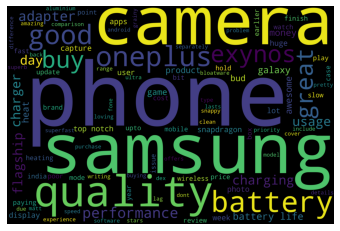

In [10]:
with open("stop.txt","r") as sw:
    stopwords = sw.read()
temp = ["this","is","awsome","Data","Science"]
[i for i in temp if i not in "is"]
product_reviews_words = [w for w in product_reviews_words if not w in stopwords]
product_rev_string = " ".join(product_reviews_words)
#creating word cloud for all words
wordcloud_product = WordCloud(background_color='black',width=3000,height=2000,max_words=100).generate(product_rev_string)
plt.axis('off')
plt.imshow(wordcloud_product)

In [11]:
product_rev_string

'flagships recent purchase samsung good job series display super amazing battery life fabulous product offers quality experience include charging adapter back cover stuck choices priced discounted galaxy watch active free case tldr comparison oneplus phone great camera cost snappiness phone details speed lot living india accustomed ultra fast responsiveness oneplus phones optimised speed selling point oneplus takes lead dept slow phone match snappy standards oneplus oneplus user oneplus camera professional photographer huge difference camera quality samsung oneplus phones selfie camera oneplus hold candle phone camera samsung bloatware years samsung criticised overloading phones preloaded samsung apps majority users contrary oneplus held great rep providing clean android box phone samsung apps number intrusive sceptical buying father mid range model samsung lot bloatware surprise point oneplus cleaner pretty clean samsung exynos game lot phone person benchmark comparisons usage phone s

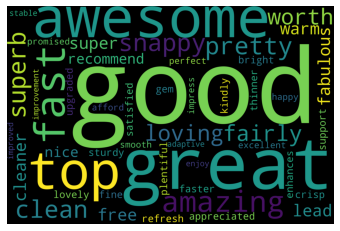

In [12]:
with open("positive-words.txt","r") as pos:
    poswords = pos.read().split("\n")  
    poswords = poswords[36:]

product_pos_in_pos = " ".join ([w for w in product_reviews_words if w in poswords])
wordcloud_pos_in_pos = WordCloud(background_color='black',width=3000,height=2000).generate(product_pos_in_pos)
plt.axis('off')
plt.imshow(wordcloud_pos_in_pos)


In [13]:
poswords

['abound',
 'abounds',
 'abundance',
 'abundant',
 'accessable',
 'accessible',
 'acclaim',
 'acclaimed',
 'acclamation',
 'accolade',
 'accolades',
 'accommodative',
 'accomodative',
 'accomplish',
 'accomplished',
 'accomplishment',
 'accomplishments',
 'accurate',
 'accurately',
 'achievable',
 'achievement',
 'achievements',
 'achievible',
 'acumen',
 'adaptable',
 'adaptive',
 'adequate',
 'adjustable',
 'admirable',
 'admirably',
 'admiration',
 'admire',
 'admirer',
 'admiring',
 'admiringly',
 'adorable',
 'adore',
 'adored',
 'adorer',
 'adoring',
 'adoringly',
 'adroit',
 'adroitly',
 'adulate',
 'adulation',
 'adulatory',
 'advanced',
 'advantage',
 'advantageous',
 'advantageously',
 'advantages',
 'adventuresome',
 'adventurous',
 'advocate',
 'advocated',
 'advocates',
 'affability',
 'affable',
 'affably',
 'affectation',
 'affection',
 'affectionate',
 'affinity',
 'affirm',
 'affirmation',
 'affirmative',
 'affluence',
 'affluent',
 'afford',
 'affordable',
 'affordabl

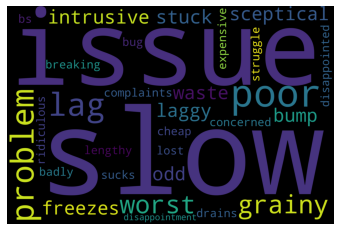

In [14]:
with open("negative-words.txt","r",encoding = "ISO-8859-1") as neg:
    negwords = neg.read().split("\n")
    negwords = negwords[37:]

# negative word cloud
# Choosing the only words which are present in negwords
product_neg_in_neg = " ".join ([w for w in product_reviews_words if w in negwords])

wordcloud_neg_in_neg = WordCloud(background_color='black',width=3000,height=2000).generate(product_neg_in_neg)
plt.axis('off')
plt.imshow(wordcloud_neg_in_neg)

#here we are getting the most repeated negative Wordcloud

In [15]:
negwords

['abnormal',
 'abolish',
 'abominable',
 'abominably',
 'abominate',
 'abomination',
 'abort',
 'aborted',
 'aborts',
 'abrade',
 'abrasive',
 'abrupt',
 'abruptly',
 'abscond',
 'absence',
 'absent-minded',
 'absentee',
 'absurd',
 'absurdity',
 'absurdly',
 'absurdness',
 'abuse',
 'abused',
 'abuses',
 'abusive',
 'abysmal',
 'abysmally',
 'abyss',
 'accidental',
 'accost',
 'accursed',
 'accusation',
 'accusations',
 'accuse',
 'accuses',
 'accusing',
 'accusingly',
 'acerbate',
 'acerbic',
 'acerbically',
 'ache',
 'ached',
 'aches',
 'achey',
 'aching',
 'acrid',
 'acridly',
 'acridness',
 'acrimonious',
 'acrimoniously',
 'acrimony',
 'adamant',
 'adamantly',
 'addict',
 'addicted',
 'addicting',
 'addicts',
 'admonish',
 'admonisher',
 'admonishingly',
 'admonishment',
 'admonition',
 'adulterate',
 'adulterated',
 'adulteration',
 'adulterier',
 'adversarial',
 'adversary',
 'adverse',
 'adversity',
 'afflict',
 'affliction',
 'afflictive',
 'affront',
 'afraid',
 'aggravate',